In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../../pyopenms-viz')

import pandas as pd
from bokeh.io import output_notebook, show

output_notebook()

Loading BokehJS ...

In [2]:
df_chrom = pd.read_csv("../test/test_data/ionMobilityTestChromatogramDf.tsv", sep="\t")
print(df_chrom.head())
df_feat = pd.read_csv("../test/test_data/ionMobilityTestChromatogramFeatures.tsv", sep="\t")
print(df_feat.head())

   native_id  ms_level          mz           rt         int  precursor_mz  \
0        NaN         1  642.334187  6225.005106  229.011740      642.3295   
1        NaN         2  504.262011  6225.110817  152.002630      642.3295   
2        NaN         2  591.298142  6225.110817  273.003703      642.3295   
3        NaN         2  704.384928  6225.110817   41.000973      642.3295   
4        NaN         2  704.389080  6225.110817   41.000973      642.3295   

   product_mz Annotation  
0    642.3295       prec  
1    504.2664       y4^1  
2    591.2984       y5^1  
3    704.3825       y6^1  
4    704.3825       y6^1  
   leftWidth  rightWidth  apexIntensity
0       6235        6250         345083


Let's plot some chromatograms, first we need to load a config class to set some parameters, and load the main pyopenmsviz class to make plot function calls.

TODO: Add default configs to the plotting classes themselves

In [3]:
from pyopenms_viz.plotting._config import ChromatogramPlotterConfig, LegendConfig
from pyopenms_viz.pyopenmsviz import pyopenmsviz

## Plotting with pyopenmsviz

We can pass the pandas dataframe to initiate a pyopenmsviz object, which we can use for plotting. We specify the columns we want to plot on the x and y axies, and we specify what kind of plot to generate using a specified backend.

In [4]:
data = pyopenmsviz(df_chrom)
plot_obj = data.plot(x='rt', y='int', kind='chromatogram', backend='bokeh')

We can pass additional arguments to the plot method to configure the plot and how the data is plotted. For example, we can use the `by` argument to control how the data is separated when plotting individual traces based on a column in the dataframe specified by the `by` argument.

In [5]:
plot_obj = data.plot(x='rt', y='int', kind='chromatogram', by="Annotation", backend='bokeh')

We can also plot a spectrum using the same object

In [6]:
plot_obj = data.plot(x='mz', y='int', kind='spectrum', by="Annotation", backend='bokeh')

In [7]:
plot_obj = data.plot(x='rt', y='mz', z='int', kind='feature_heatmap', by="Annotation", ylabel="mass-to-charge", backend='bokeh')

## Aesthetics and Plot Customization

We can also pass additional arguments to control the aesthetics of the plot, such as title

In [8]:
plot_obj = data.plot(x='rt', y='int', kind='chromatogram', by="Annotation", title="Extracted Ion Chromatogram", backend='bokeh')

We can also pass a config object to control all of the customization of the plot in one place

In [9]:
config = ChromatogramPlotterConfig(title="Extracted Ion Chromatogram", 
                            xlabel="Retention Time [sec]", 
                            ylabel="Intensity", 
                            height=500, width=800,
                            grid=False, show_plot=True,
                            toolbar_location='above',
                            legend=LegendConfig(title="Transition", onClick="hide")
                           )
plot_obj = data.plot(x='rt', y='int', kind='chromatogram', by="Annotation", config=config, backend='bokeh')

## Adding manual vertical strip boundaries to the plot and other features

It's possible to either add an additional dataframe (`feautre_data` arg) containing leftWidth and rightWidth columns specifying peak boundaries or draw bounding strips to the plot extract coordinates for manual peak boundaries. There is a box-edit tool with the peak icon than you can select to draw boxes. 

- To draw boxes - hold the left-click mouse button for a few seconds, then you can release to start drawing. To stop drawing, hold the left-click and move the mouse away.
- To move boxes - double click on a box and move it around and then release.
- To delete boxes - click on a box, and press backspace to remove. 
- Unclick the box-edit tool to deactivate the tool

In [10]:
plot_obj = data.plot(x='rt', y='int', kind='chromatogram', feature_data=df_feat, by="Annotation", config=config, backend='bokeh')

To obtain the coordinates, you can call the `get_manual_bounding_box_coords` method to extract the draw boundaries on the x-axis.

In [11]:
plot_obj.get_manual_bounding_box_coords()

,leftWidth,rightWidth


We can also draw bounding boxes in the feature heatmaps

In [12]:
plot_obj = data.plot(x='rt', y='mz', z='int', kind='feature_heatmap', by="Annotation", ylabel="mass-to-charge", backend='bokeh')

In [13]:
plot_obj.get_manual_bounding_box_coords()

,rt_0,rt_1,mz_0,mz_1


We can also similarly do the same for spectrum plots, by passing a reference spectrum dataframe

In [14]:
import numpy as np

# Add noise to the 'int' column
noise_int = np.random.normal(0, 500, size=len(df_chrom))  
df_ref = df_chrom.copy()
df_ref['int'] = df_ref['int'] + noise_int

# Add noise to the 'mz' column
noise_mz = np.random.normal(0, 0.001, size=len(df_chrom))  
df_ref['mz'] = df_ref['mz'] + noise_mz

plot_obj = data.plot(x='mz', y='int', kind='spectrum', reference_spectrum=df_ref, by="Annotation", mirror_spectrum=True, width=800, grid=False, backend='bokeh')

We can also add marginal integrated line plots to the feature heatmap

In [15]:
plot_obj = data.plot(x='rt', y='mz', z='int', height=500, add_marginals=True, kind='feature_heatmap', by="Annotation", ylabel="mass-to-charge", zlabel="Integrated Intensity", grid=False, backend='bokeh')

## Plotting directly from pandas dataframe

Instead of initiating a pyopenmsviz class for plotting, you can directly call the plot method from the pandas dataframe object, and provide a custom backend plotting module. 

The entrypoint that is used by pandas to change the plotting backend from the dataframe `plot` method to call the plotting backend provided by pyopenms specficically for bokeh plotting is **pomsvib** (**p**y**o**pen**ms**_**vi**z **b**okeh)

In [16]:
df_chrom.plot(x='rt', y='int', kind='chromatogram', feature_data=df_feat, by="Annotation", config=config, backend='pomsvib')

You can also set the plotting backend for pandas dataframe globally for the entire session. Not sure if you would want to do this though it you had other regular plots you wanted to generate.

In [17]:
pd.set_option("plotting.backend", "pomsvib")

df_chrom.plot(x='rt', y='int', kind='chromatogram', feature_data=df_feat, by="Annotation", config=config)

# Using a different backend

To use a different backend, all you need to do is specify the backend to use.

If you are using the pyopenmsviz interface, the backend is one of 'matplotlib', 'bokeh' or 'plotly'.
If you are directly using the pandas plot method, you can set the backend to one of "pomsvim", "pomsvib" or "pomsvip".

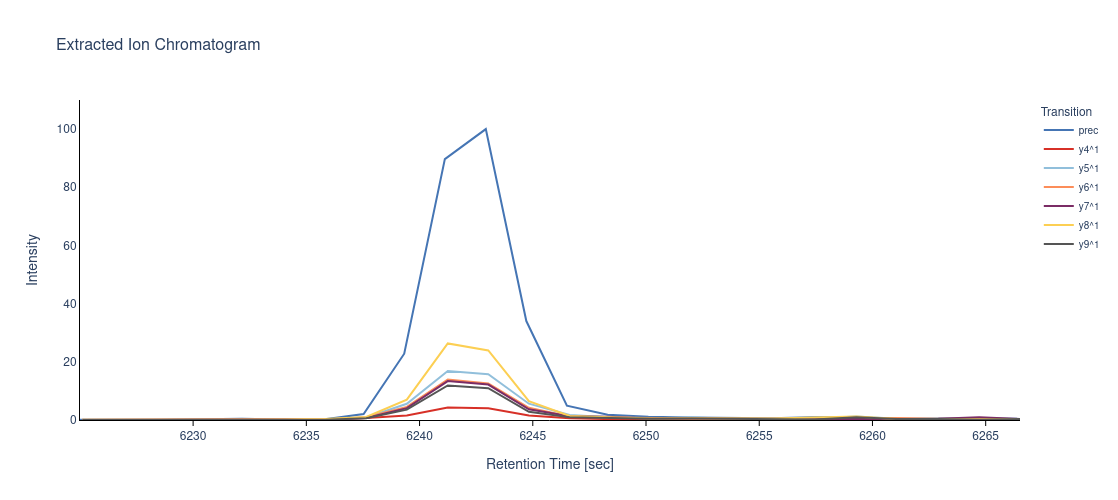

In [32]:
config = ChromatogramPlotterConfig(title="Extracted Ion Chromatogram", 
                            xlabel="Retention Time [sec]", 
                            ylabel="Intensity", 
                            height=500, width=800,
                            grid=False, show_plot=True,
                            toolbar_location='above',
                            legend=LegendConfig(title="Transition", show=True)
                           )
df_chrom.plot(x='rt', y='int', kind='chromatogram', feature_data=df_feat, by="Annotation", config=config, backend='pomsvip')